# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-01-05 20:07:50--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  84.1MB/s    in 1.0s    

2025-01-05 20:07:51 (84.1 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1

## **Load bioactivity data**

In [10]:
! pip install rdkit-pypi

     |████████████████████████████████| 29.2 MB 1.5 MB/s 


In [16]:
import pandas as pd

In [66]:
df = pd.read_csv('bioactivity_data_preprocessed.csv')
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,41.0
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,300.0
2,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,intermediate,7820.0
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,170.0
4,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,40.0
...,...,...,...,...
16713,CHEMBL3622821,CC[C@@H]1CN(C(=O)NCC(F)(F)F)C[C@@H]1c1cnc2cnc3...,inactive,10000.0
16714,CHEMBL209148,COc1cc(C)c(Sc2cnc(NC(=O)c3ccc(CNC(C)C(C)(C)C)c...,inactive,50000.0
16715,CHEMBL1852688,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,inactive,10000.0
16716,CHEMBL3643413,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,inactive,10000.0


In [67]:
# Replace missing values with an empty string
df['canonical_smiles'] = df['canonical_smiles'].fillna('')

# Alternatively, drop rows with missing or invalid SMILES
df = df.dropna(subset=['canonical_smiles'])

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [68]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [69]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [70]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [72]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,383.814,4.45034,3.0,4.0
1,383.814,4.45034,3.0,4.0
2,383.814,4.45034,3.0,4.0
3,482.903,3.61432,3.0,6.0
4,482.903,3.61432,3.0,6.0
...,...,...,...,...
16713,380.374,2.90790,2.0,4.0
16714,623.845,5.69212,2.0,8.0
16715,560.486,5.35440,2.0,8.0
16716,450.465,2.88450,1.0,7.0


In [73]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,41.0
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,300.0
2,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,intermediate,7820.0
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,170.0
4,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,40.0
...,...,...,...,...
16713,CHEMBL3622821,CC[C@@H]1CN(C(=O)NCC(F)(F)F)C[C@@H]1c1cnc2cnc3...,inactive,10000.0
16714,CHEMBL209148,COc1cc(C)c(Sc2cnc(NC(=O)c3ccc(CNC(C)C(C)(C)C)c...,inactive,50000.0
16715,CHEMBL1852688,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,inactive,10000.0
16716,CHEMBL3643413,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,inactive,10000.0


Now, let's combine the 2 DataFrame

In [74]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [75]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,41.0,383.814,4.45034,3.0,4.0
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,300.0,383.814,4.45034,3.0,4.0
2,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,intermediate,7820.0,383.814,4.45034,3.0,4.0
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,170.0,482.903,3.61432,3.0,6.0
4,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,40.0,482.903,3.61432,3.0,6.0
...,...,...,...,...,...,...,...,...
16713,CHEMBL3622821,CC[C@@H]1CN(C(=O)NCC(F)(F)F)C[C@@H]1c1cnc2cnc3...,inactive,10000.0,380.374,2.90790,2.0,4.0
16714,CHEMBL209148,COc1cc(C)c(Sc2cnc(NC(=O)c3ccc(CNC(C)C(C)(C)C)c...,inactive,50000.0,623.845,5.69212,2.0,8.0
16715,CHEMBL1852688,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,inactive,10000.0,560.486,5.35440,2.0,8.0
16716,CHEMBL3643413,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,inactive,10000.0,450.465,2.88450,1.0,7.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [76]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [77]:
df_combined.standard_value.describe()

,standard_value
count,1.671800e+04
mean,3.383089e+04
std,8.550074e+05
min,5.012000e-09
25%,1.600000e+01
50%,1.640000e+02
75%,3.058750e+03
max,8.300000e+07


In [78]:
-np.log10( (10**-9)* 100000000 )

1.0

In [79]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [80]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [81]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,41.0
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,300.0
2,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,intermediate,383.814,4.45034,3.0,4.0,7820.0
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,170.0
4,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,40.0
...,...,...,...,...,...,...,...,...
16713,CHEMBL3622821,CC[C@@H]1CN(C(=O)NCC(F)(F)F)C[C@@H]1c1cnc2cnc3...,inactive,380.374,2.90790,2.0,4.0,10000.0
16714,CHEMBL209148,COc1cc(C)c(Sc2cnc(NC(=O)c3ccc(CNC(C)C(C)(C)C)c...,inactive,623.845,5.69212,2.0,8.0,50000.0
16715,CHEMBL1852688,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,inactive,560.486,5.35440,2.0,8.0,10000.0
16716,CHEMBL3643413,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,inactive,450.465,2.88450,1.0,7.0,10000.0


In [82]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,1.671800e+04
mean,3.383089e+04
std,8.550074e+05
min,5.012000e-09
25%,1.600000e+01
50%,1.640000e+02
75%,3.058750e+03
max,8.300000e+07


In [83]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,7.387216
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,6.522879
2,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,intermediate,383.814,4.45034,3.0,4.0,5.106793
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.769551
4,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,7.397940
...,...,...,...,...,...,...,...,...
16713,CHEMBL3622821,CC[C@@H]1CN(C(=O)NCC(F)(F)F)C[C@@H]1c1cnc2cnc3...,inactive,380.374,2.90790,2.0,4.0,5.000000
16714,CHEMBL209148,COc1cc(C)c(Sc2cnc(NC(=O)c3ccc(CNC(C)C(C)(C)C)c...,inactive,623.845,5.69212,2.0,8.0,4.301030
16715,CHEMBL1852688,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,inactive,560.486,5.35440,2.0,8.0,5.000000
16716,CHEMBL3643413,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,inactive,450.465,2.88450,1.0,7.0,5.000000


In [84]:
df_final.pIC50.describe()

,pIC50
count,16718.000000
mean,6.694602
std,1.512974
min,1.080922
25%,5.514456
50%,6.785156
75%,7.795880
max,17.299989


### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [85]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,7.387216
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,6.522879
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.769551
4,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,7.397940
5,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.356547
...,...,...,...,...,...,...,...,...
16713,CHEMBL3622821,CC[C@@H]1CN(C(=O)NCC(F)(F)F)C[C@@H]1c1cnc2cnc3...,inactive,380.374,2.90790,2.0,4.0,5.000000
16714,CHEMBL209148,COc1cc(C)c(Sc2cnc(NC(=O)c3ccc(CNC(C)C(C)(C)C)c...,inactive,623.845,5.69212,2.0,8.0,4.301030
16715,CHEMBL1852688,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,inactive,560.486,5.35440,2.0,8.0,5.000000
16716,CHEMBL3643413,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,inactive,450.465,2.88450,1.0,7.0,5.000000


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [86]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

[link text](https://)### **Frequency plot of the 2 bioactivity classes**

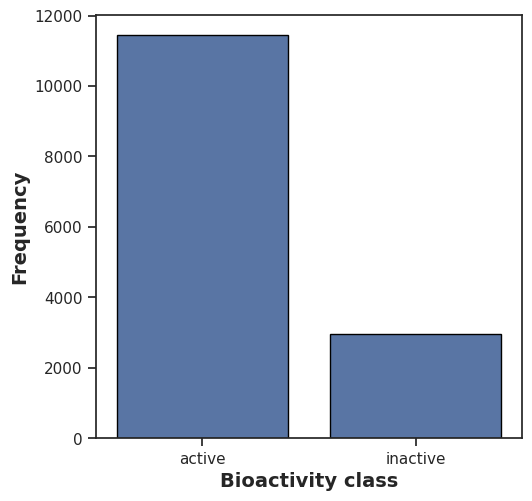

In [87]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

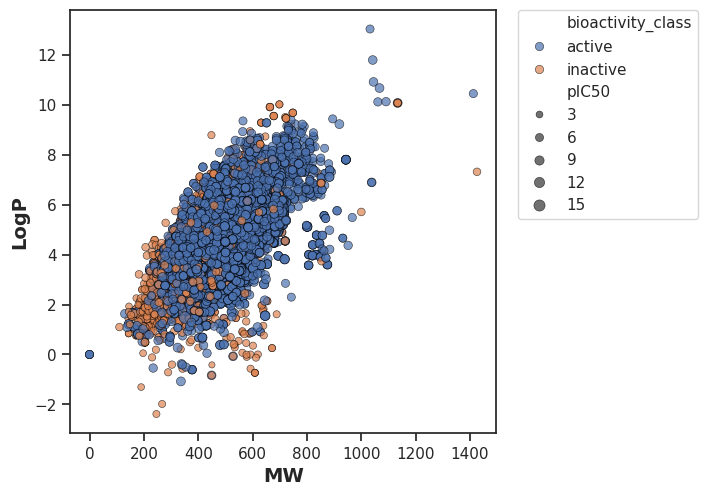

In [88]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

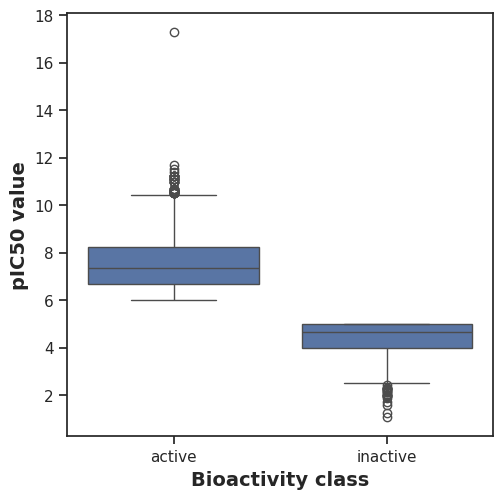

In [89]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [90]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,1.662636e-10,0.05,Different distribution (reject H0)


#### **MW**

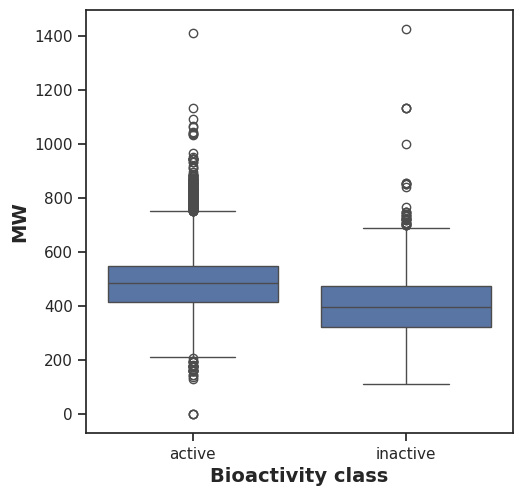

In [91]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [92]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,23812144.5,2.045158e-261,0.05,Different distribution (reject H0)


#### **LogP**

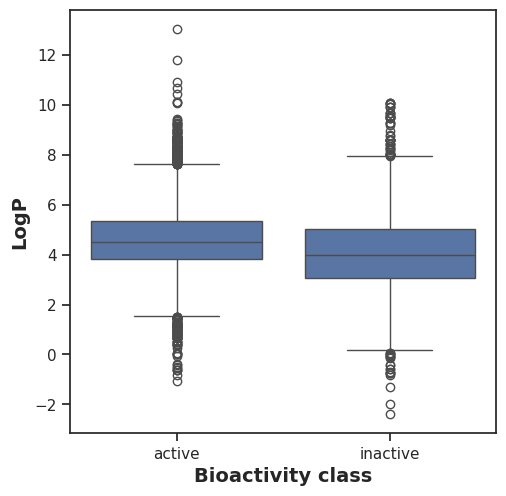

In [93]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [94]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,20847832.0,2.803944e-87,0.05,Different distribution (reject H0)


#### **NumHDonors**

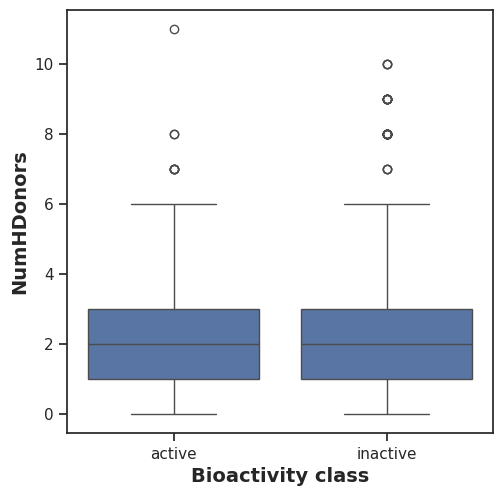

In [95]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [96]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,17826007.0,3.823838e-07,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

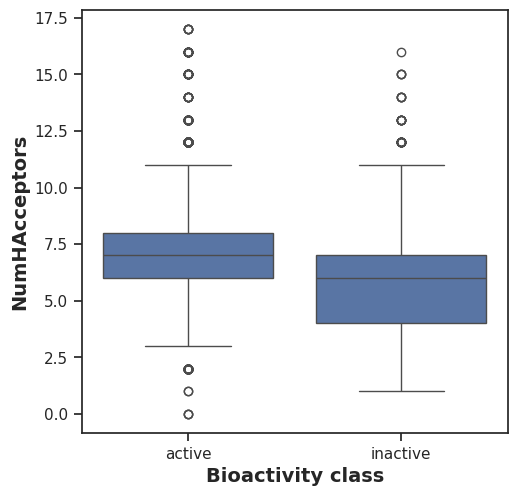

In [97]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [98]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,22928242.0,6.701988e-204,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [99]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_MW.csv (deflated 10%)
  adding: plot_MW.pdf (deflated 35%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 1%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 32%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: bioactivity_data_preprocessed.csv (deflated 86%)


In [100]:
! cp results.zip "/content/gdrive/My Drive/ScienceFair/DrugDesign/Colab"

cp: cannot create regular file '/content/gdrive/My Drive/ScienceFair/DrugDesign/Colab': No such file or directory
